In [1]:
import numpy as np
import matplotlib.pyplot as plt

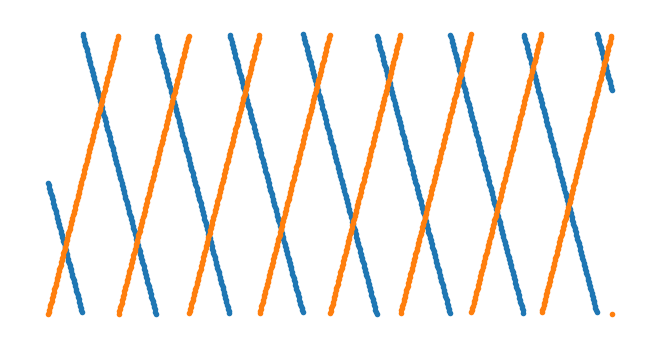

In [2]:
t = np.linspace(0,100,1000)

X = -((t+20)*2.3 % 30) + 30
Y = t*2.4 % 30


ax = plt.figure(figsize=(4,2), dpi=200).add_subplot()
ax.scatter(t,X, s=1)
ax.scatter(t,Y, s=1)
# ax.set_ylim(7,23)

for s in ax.spines.values(): s.set_visible(False)
ax.set_xticks([]);
ax.set_yticks([]);
plt.savefig('docs/figures/panels/out-of-phase.svg')

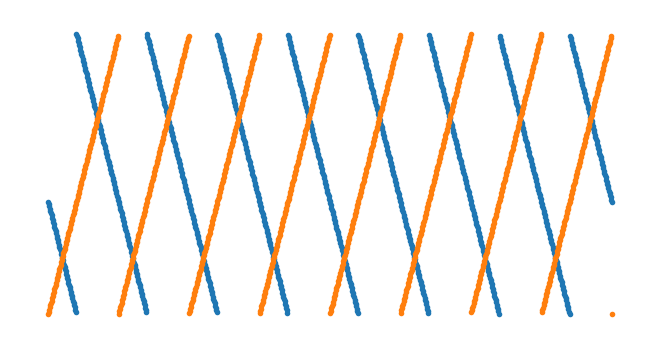

In [3]:
t = np.linspace(0,100,1000)

X = -((t+20)*2.4 % 30) + 30
Y = t*2.4 % 30


ax = plt.figure(figsize=(4,2), dpi=200).add_subplot()
ax.scatter(t,X, s=1)
ax.scatter(t,Y, s=1)
# ax.set_ylim(7,23)

for s in ax.spines.values(): s.set_visible(False)
ax.set_xticks([]);
ax.set_yticks([]);

plt.savefig('docs/figures/panels/in-phase.svg')

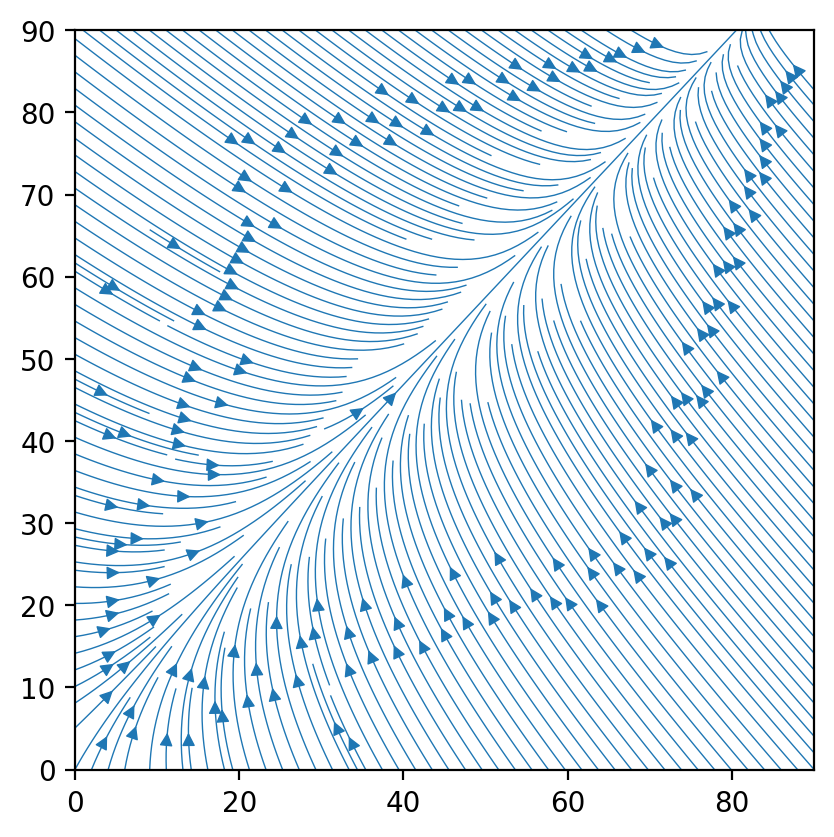

In [4]:
def f(y,z,eps):
    return (
        -(y-10) + .8*z,
        -(z-20)/1.1 + .81*y,
    )

eps = 1e-1

y = np.linspace(0,90,100)
z = np.linspace(0,90,100)

yy, zz = np.meshgrid(y,z)

uu, vv = f(yy,zz,eps=eps)

ax = plt.figure(dpi=200).add_subplot()
ax.streamplot(yy,zz,uu,vv, density=3, linewidth=0.5)
ax.set_aspect('equal')


# ax.set_ylim(-3,3)
# ax.set_xlim(-3,3)


In [5]:
def get_omegas_angles_diff(eps, sf, off):
    t = np.linspace(0,500,1000)

    omega1 = 2*np.pi + eps * np.sin(t)
    omega2 = 2*np.pi + eps * np.sin(t+sf) + off


    p1 = omega1 * t % 2*np.pi
    p2 = -(omega2 * t % 2*np.pi) + 2*np.pi

    forw = np.abs(p1 - p2)
    back = np.abs(2*np.pi - forw)
    diff = np.where(forw<back, forw, back)

    return (omega1, omega2), (p1, p2), diff


def plot_omegas_diff(axs, eps, sf, off):
    omegas, ps, diff = get_omegas_angles_diff(eps, sf, off)

    ax = axs[0]
    ax.plot(omegas[0][:40])
    ax.plot(omegas[1][:40])

    ax.set_ylim(6,6.6)
    # ax.set_yscale('log')

    # for s in ax.spines.values():
    #     s.set_visible(False)

    ax.spines['left'].set_visible(True)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('Time')
    ax.set_ylabel("Angular\nfrequency")

    ax = axs[1]
    ax.scatter(ps[0], diff, s=1, label='Phase difference [rad]')
    # ax.legend(frameon=False, loc=(0,-0.3), markerscale=4)
    # ax.set_ylabel('Angle (position) along\nellipsoid body', labelpad=30)


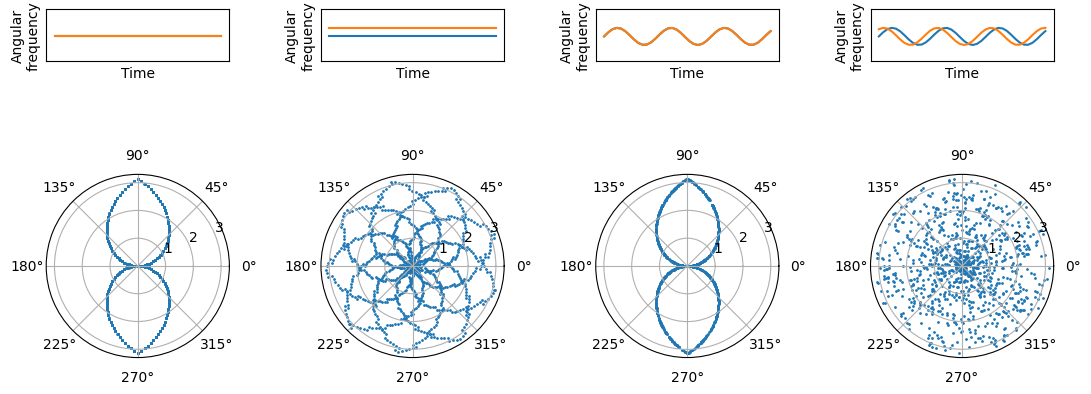

In [6]:
fig, axs = plt.subplot_mosaic(
    '''
    ABCD
    IJKL
    ''',
    height_ratios = (1,5),
    per_subplot_kw={'IJKL' : dict(projection='polar')},
    dpi=100,
    figsize=(13,5)
)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

axs = np.array([ax for ax in axs.values()]).reshape(2,-1)

plot_omegas_diff(axs.T[0], 0., 0, 0)
plot_omegas_diff(axs.T[1], 0., 0., 0.1)
plot_omegas_diff(axs.T[2], 0.1, 0., 0.0)
plot_omegas_diff(axs.T[3], 0.1, 1, 0)
# plot_omegas_diff(axs.T[3], 0.3, 1)


Coupling of FN neurons

In [7]:
from scipy.integrate import solve_ivp

In [8]:
legend_kwargs = dict(frameon=True, ncols=2)

Text(0.5, 1.0, 'Lissajous')

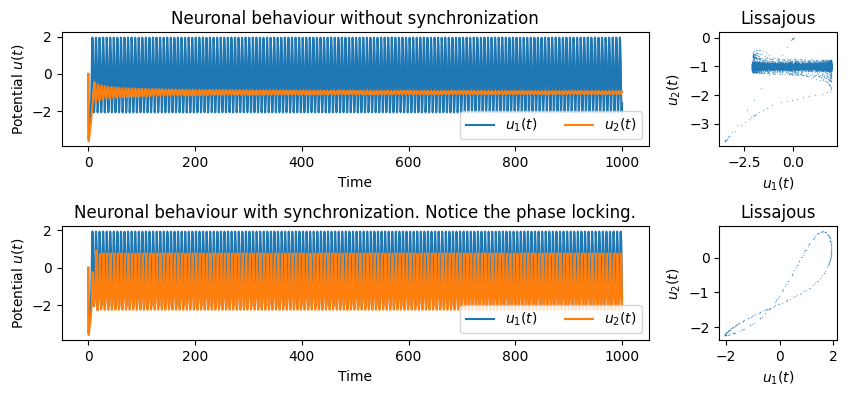

In [91]:
def f(
    t,y, 
    c1=0.,
    c2=0.,
    a1=.1,
    a2=1,
    tau1=1.,
    tau2=2.,
):
    u1, v1, u2, v2 = y

    return (
        u1 - u1**3/3 - v1 + c1*np.exp(u2-u1),
        u1 + a1,
        u2 - u2**3/3 - v2 + c2*np.exp(u1-u2),
        u2 + a2
    )

fig, axs = plt.subplots(2,2,figsize=(10,4), width_ratios=(5,1), dpi=100)
plt.subplots_adjust(hspace=0.7)

y0 = (0,12,0,13)


## First plot
res = solve_ivp(f, t_span=[0,1000], y0=y0, method='BDF', args=(0,0,))

ax = axs[0,0]
ax.plot(res.t, res.y[0], label=r'$u_1(t)$')
ax.plot(res.t, res.y[2], label=r'$u_2(t)$')
# ax.plot(res.t, res.y[0] - res.y[2])
# ax.axhline(y=0)

ax.legend(**legend_kwargs)
ax.set_title('Neuronal behaviour without synchronization')
ax.set_xlabel('Time')
ax.set_ylabel('Potential $u(t)$')


ax = axs[0,1]
ax.scatter(res.y[0], res.y[2], s=1, linewidth=0, alpha=0.5)
ax.set_xlabel(r'$u_1(t)$')
ax.set_ylabel(r'$u_2(t)$')
ax.set_title('Lissajous')

## Second plot
res = solve_ivp(f, t_span=[0,1000], y0=y0, method='BDF', args=(0.1,0.2,))

ax = axs[1,0]
ax.plot(res.t, res.y[0], label=r'$u_1(t)$')
ax.plot(res.t, res.y[2], label=r'$u_2(t)$')

ax.legend(**legend_kwargs)
ax.set_title('Neuronal behaviour with synchronization. Notice the phase locking.')
ax.set_xlabel('Time')
ax.set_ylabel('Potential $u(t)$')

ax = axs[1,1]
ax.scatter(res.y[0,-200:], res.y[2, -200:], s=1, linewidth=0, alpha=0.5)
ax.set_xlabel(r'$u_1(t)$')
ax.set_ylabel(r'$u_2(t)$')
ax.set_title('Lissajous')


Text(0, 0.5, '$u_2(t)$')

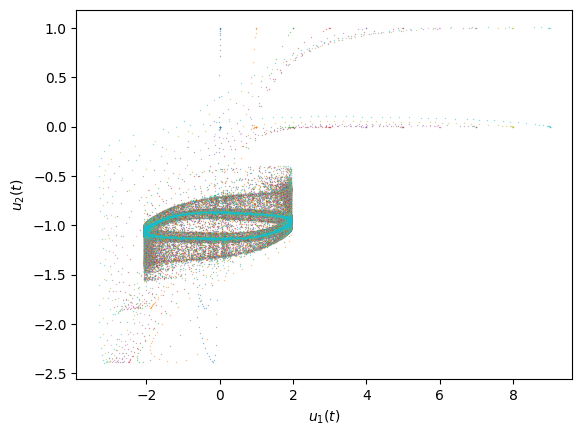

In [10]:
for u1_init in np.arange(10):
    y0 = (u1_init, u1_init, 0, 0,)
    res = solve_ivp(f, t_span=[0,1000], y0=y0, method='BDF', args=(0.001,0.002,))

    plt.scatter(res.y[0], res.y[2], s=1, linewidth=0, alpha=0.5)
    
for u1_init in np.arange(10):
    y0 = (u1_init, u1_init, 1, 2,)
    res = solve_ivp(f, t_span=[0,1000], y0=y0, method='BDF', args=(0.001,0.002,))

    plt.scatter(res.y[0], res.y[2], s=1, linewidth=0, alpha=0.5)

plt.xlabel(r'$u_1(t)$')
plt.ylabel(r'$u_2(t)$')

# From the guys thesis

Example with the normal oscillators

In [92]:
def plotter(RHS, coupling: tuple = (0.1, 0.2), y0: tuple = (1,1,1,1)):

    fig, axs = plt.subplots(2,2,figsize=(10,4), width_ratios=(5,1), dpi=100)
    plt.subplots_adjust(hspace=0.7)

    res = solve_ivp(RHS, t_span=[0,1000], y0=y0, method='BDF', args=(0,0,))

    ax = axs[0,0]
    ax.plot(res.t, res.y[0], label=r'$u_1(t)$')
    ax.plot(res.t, res.y[2], label=r'$u_2(t)$')

    ax.legend(**legend_kwargs)
    ax.set_title('Neuronal behaviour without synchronization')
    ax.set_xlabel('Time')
    ax.set_ylabel('Potential $u(t)$')


    ax = axs[0,1]
    ax.scatter(res.y[0,-200:], res.y[2,-200:], s=1, linewidth=0, alpha=0.5)
    # ax.set_xlim(-1,1)
    # ax.set_ylim(-1,1)
    
    ax.set_xlabel(r'$u_1(t)$')
    ax.set_ylabel(r'$u_2(t)$')
    ax.set_title('Lissajous')

    ## Second plot
    res = solve_ivp(RHS, t_span=[0,1000], y0=y0, method='BDF', args=(1,1.2,))

    ax = axs[1,0]
    ax.plot(res.t, res.y[0], label=r'$u_1(t)$')
    ax.plot(res.t, res.y[2], label=r'$u_2(t)$')

    ax.legend(**legend_kwargs)
    ax.set_title('Neuronal behaviour with synchronization. Notice the phase locking.')
    ax.set_xlabel('Time')
    ax.set_ylabel('Potential $u(t)$')

    ax = axs[1,1]
    ax.scatter(res.y[0, -200:], res.y[2, -200:], s=1, linewidth=0, alpha=0.5)
    # ax.set_xlim(-1,1)
    # ax.set_ylim(-1,1)
    ax.set_xlabel(r'$u_1(t)$')
    ax.set_ylabel(r'$u_2(t)$')
    ax.set_title('Lissajous')


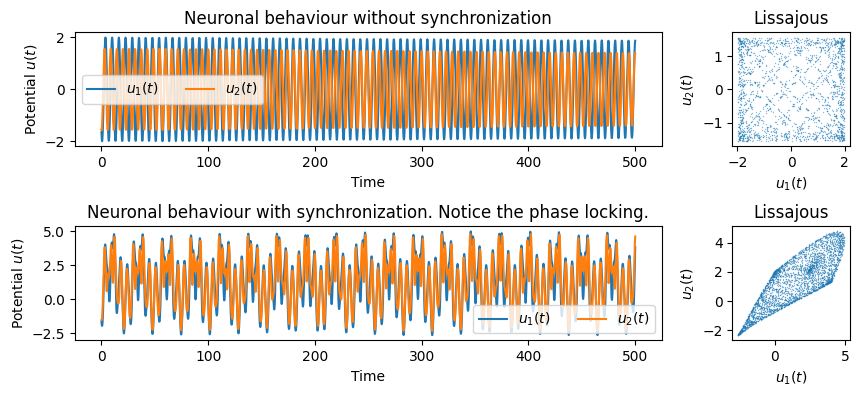

In [12]:
def gen_RHS(
    omega1 = 1,
    omega2 = 1.1,
):

    def f(t,y,coupling1, coupling2):

        x1,v1,x2,v2 = y

        g = (x1-x2)**2

        return (
            v1,
            -omega1**2 * x1 + coupling1 * g,
            v2,
            -omega2**2 * x2 + coupling2 * g
        )

    return f

RHS = gen_RHS()
rng = np.random.default_rng(2023)

plotter(rng, RHS)


Equations with Duffing term

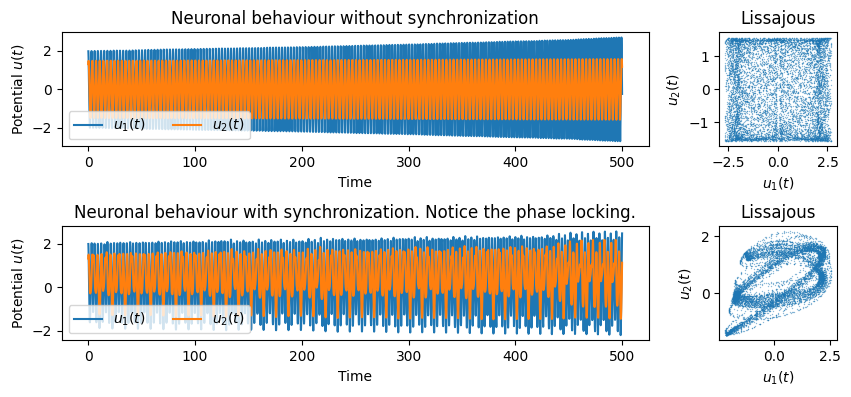

In [13]:
def gen_RHS(
    omega1 = 1,
    omega2 = 1.1,
    a1 = 1.2,
    a2 = 1.3,
):

    def f(t,y,coupling1, coupling2):

        x1,v1,x2,v2 = y

        g = (x1-x2)**2

        return (
            v1,
            -omega1**2 * x1 + coupling1 * g - a1*x1**3,
            v2,
            -omega2**2 * x2 + coupling2 * g - a2*x2**3
        )

    return f

RHS = gen_RHS()
rng = np.random.default_rng(2025)

plotter(rng, RHS)


With van der Pol term

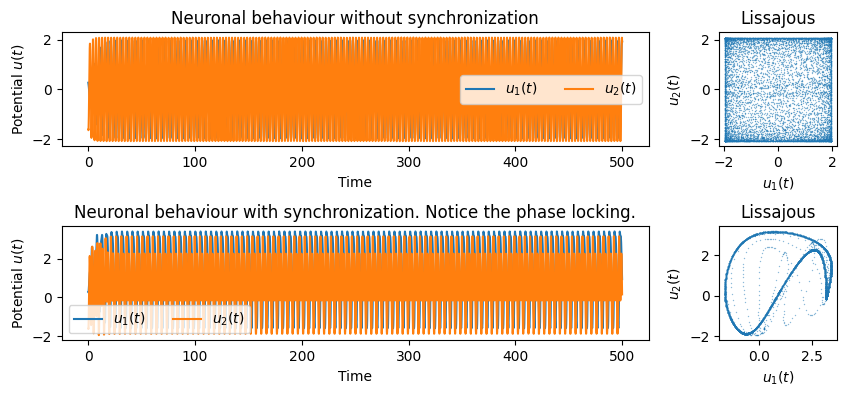

In [33]:
def gen_RHS(
    omega1 = 1,
    omega2 = 2,
    a1 = .2,
    a2 = .3,
    ni1 = .4,
    ni2 = .5,
):

    def f(t,y,coupling1, coupling2):

        x1,v1,x2,v2 = y

        g = (x1-x2)**2

        return (
            v1,
            -omega1**2 * x1 + coupling1 * g - a1*x1**3 - v1*ni1*(x1**2-1),
            v2,
            -omega2**2 * x2 + coupling2 * g - a2*x2**3 - v2*ni2*(x2**2-1.1),
        )

    return f
    
RHS = gen_RHS()
rng = np.random.default_rng(16)

plotter(rng, RHS)


The other paper about forcing

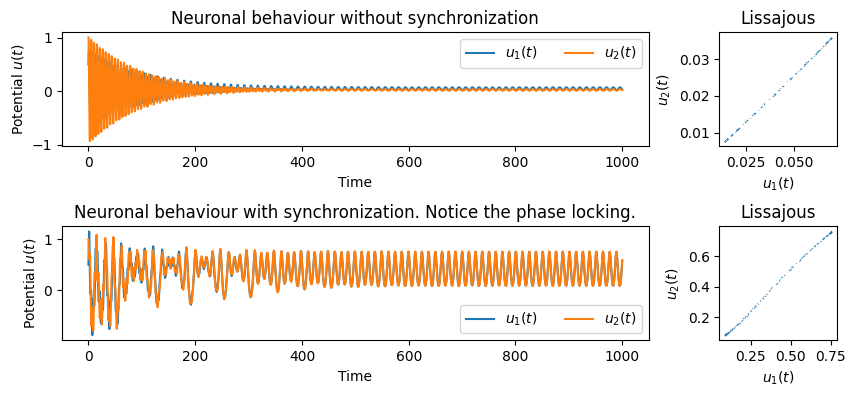

In [149]:
def gen_RHS(
    omega1 = 1,
    omega2 = 1.1,
    lambda1 = .02,
    lambda2 = .023,
    forcing1 = .021,
    forcing2 = .012,
):

    def f(t,y,coupling1, coupling2):

        x1,v1,x2,v2 = y

        return (
            v1,
            -lambda1 * v1 - omega1 * np.tan(x1) + forcing1*(np.sin(t/2)+2) + coupling1 * x2,
            v2,
            -lambda2 * v2 - omega2 * np.tan(x2) + forcing2*(np.sin(t/2)+2) + coupling2 * x1,
        )

    return f
    
RHS = gen_RHS()
rng = np.random.default_rng(2)

plotter(RHS, y0=(.5,.6,1,0))
